# ECE 228 Unet (Kaggle nucleus dataset)

# Python imports

In [1]:
import numpy as np
import os
import sys
from matplotlib import pyplot as plt
%matplotlib inline  

import torch
from torch import nn
from torch.autograd import Variable
from torchvision import transforms, utils
from skimage import io, transform
from skimage.color import rgb2gray

from models import * 
from train import *


train_imgs shape =  (30, 1, 512, 512)
train_labels shape =  (30, 1, 512, 512)


# Load nucleus data

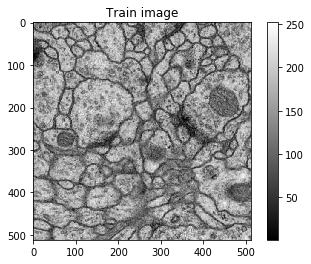

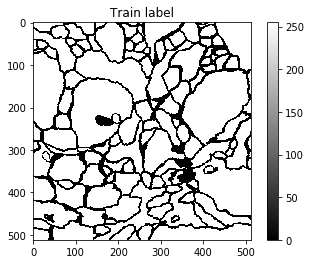

train_imgs shape =  (30, 1, 512, 512)
train_labels shape =  (30, 1, 512, 512)


In [22]:
from PIL import Image

data_tif = Image.open('datasets/isbi_2012/train-volume.tif')
train_imgs = []
i = 0
while True:
    try:
        data_tif.seek(i)
        train_imgs.append(np.array(data_tif))

        i += 1
    except EOFError:
        # Not enough frames in img
        break
        
train_imgs = np.array(train_imgs)
train_imgs = np.expand_dims(train_imgs, axis=1)


label_tif = Image.open('datasets/isbi_2012/train-labels.tif')
train_labels = []
i = 0
while True:
    try:
        label_tif.seek(i)
        train_labels.append(np.array(label_tif))

        i += 1
    except EOFError:
        # Not enough frames in img
        break
        
train_labels = np.array(train_labels)
train_labels = np.expand_dims(train_labels, axis=1)

plt.imshow(np.squeeze(train_imgs[0]),cmap="gray")
plt.title("Train image")
plt.colorbar()
plt.show()

plt.imshow(np.squeeze(train_labels[0]), cmap="gray")
plt.title("Train label")
plt.colorbar()
plt.show()


train_imgs = (train_imgs/127)-1
train_labels = (train_labels != 0).astype(np.uint8)




print("train_imgs shape = ",train_imgs.shape)
print("train_labels shape = ",train_labels.shape)




# Run Training

GPU is enabled 
80/20 training/validation split
total_train_size =  30
val_size =  6
epoch: 0, train loss: 0.3599739708006382


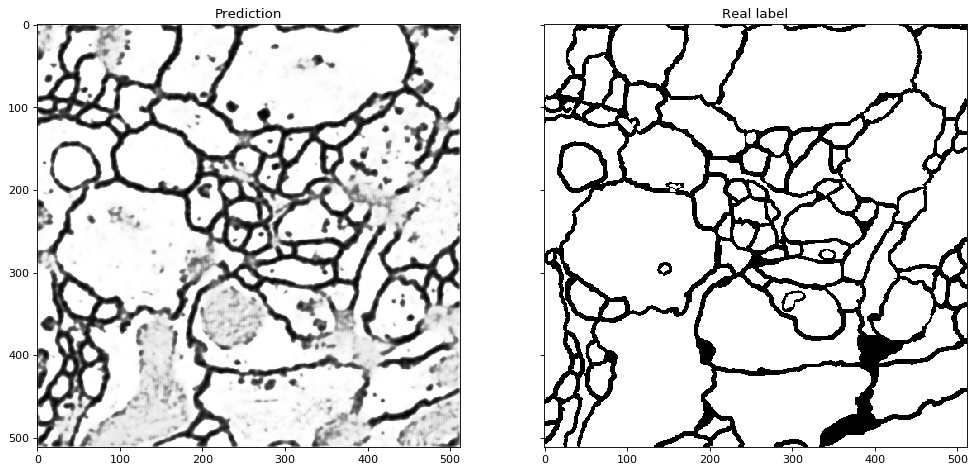

Network evaluation at epoch: 0 

train_avg_loss = 0.2828, train_avg_f1_score = 0.8851 
train_avg_precision = 0.7948, train_avg_recall = 0.9992 

val_avg_loss = 0.2705, val_avg_f1_score = 0.8865 
val_avg_precision = 0.7967, val_avg_recall = 0.9995 


epoch: 1, train loss: 0.2577169978370269


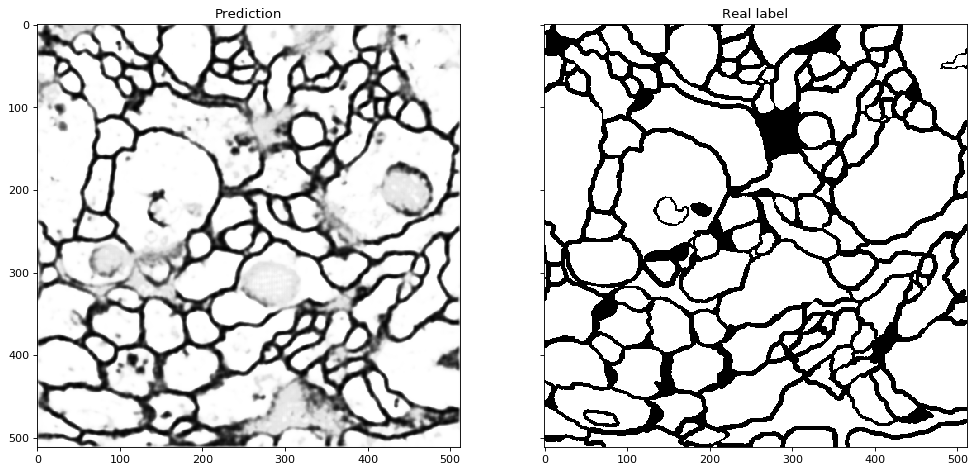

epoch: 2, train loss: 0.23720605919758478


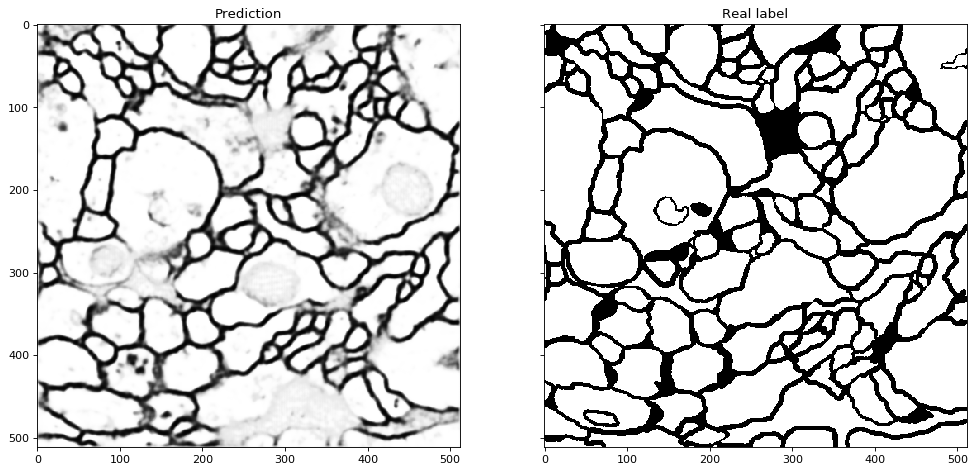

epoch: 3, train loss: 0.23186246740321317


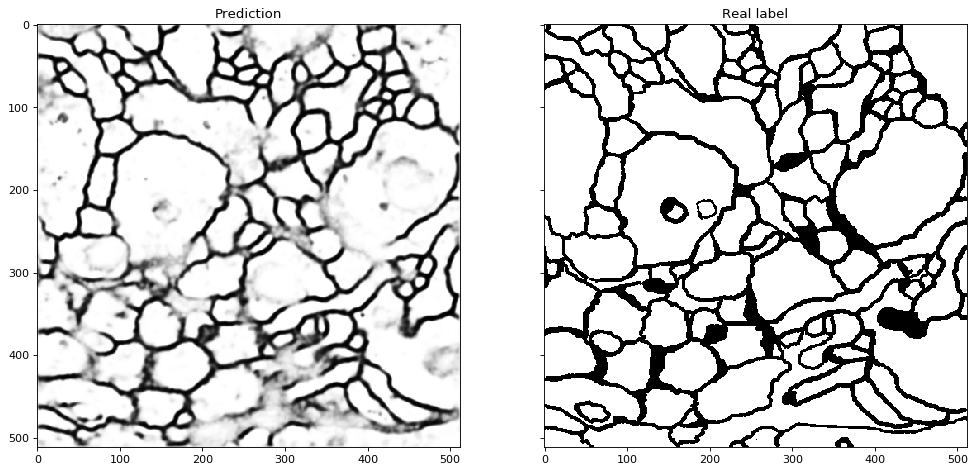

epoch: 4, train loss: 0.22200283408164978


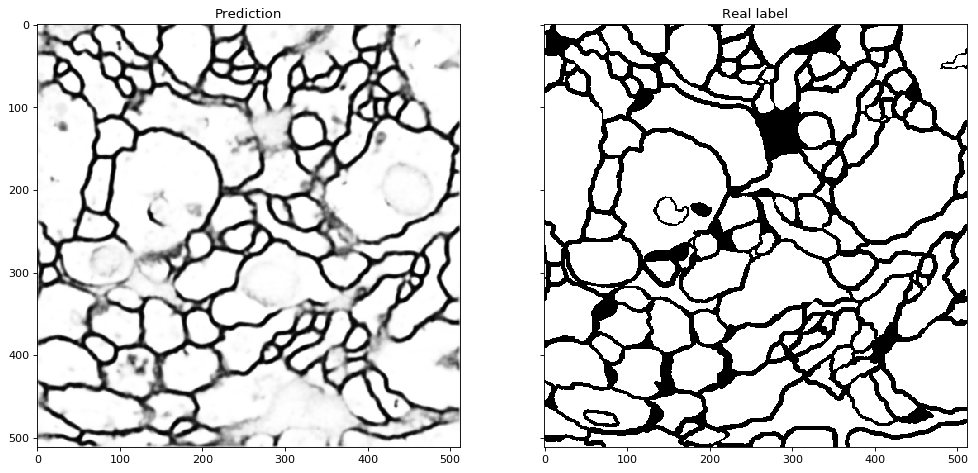

epoch: 5, train loss: 0.21699287431935468


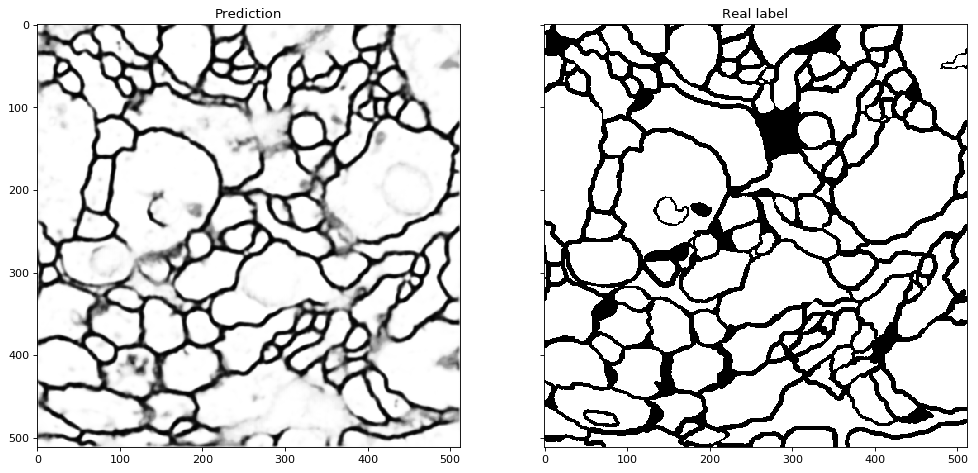

epoch: 6, train loss: 0.2094857425739368


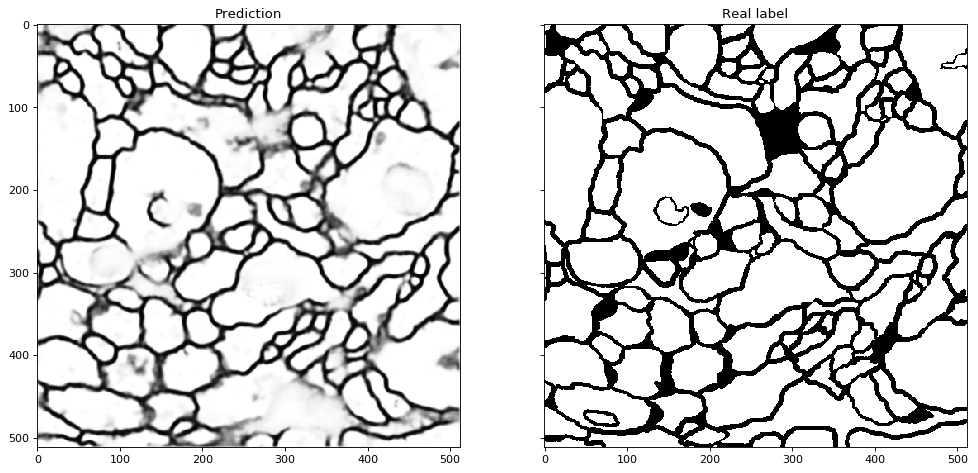

epoch: 7, train loss: 0.21136613128085932


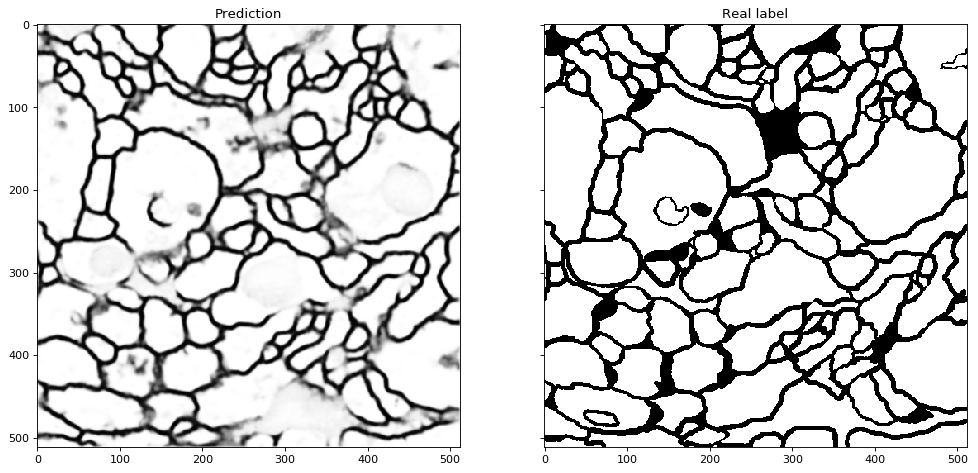

epoch: 8, train loss: 0.2047389249006907


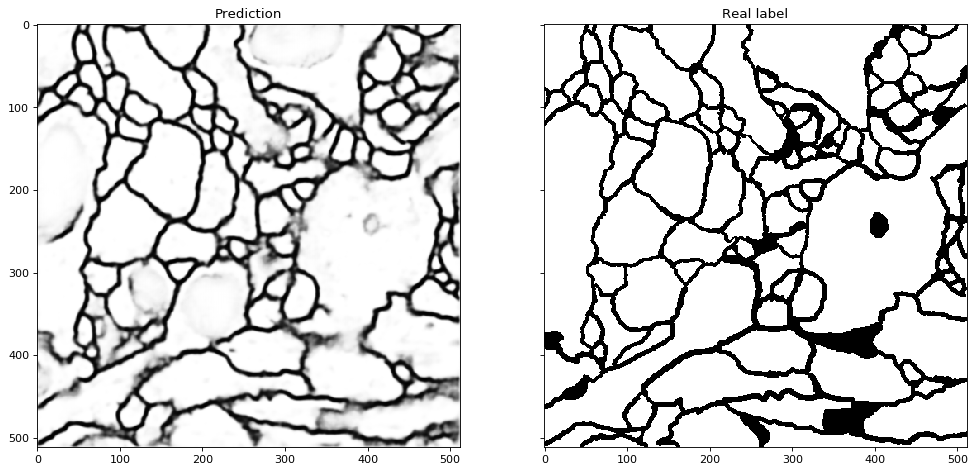

epoch: 9, train loss: 0.19853374672432741


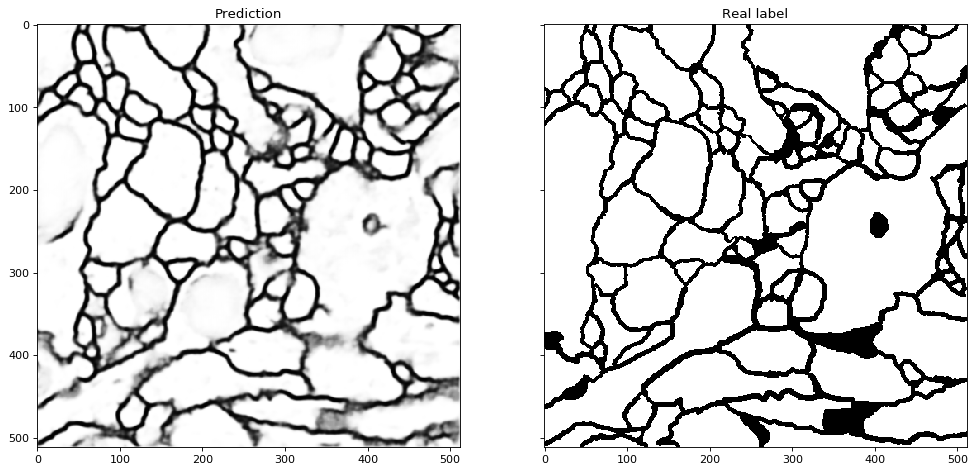

epoch: 10, train loss: 0.1929256096482277


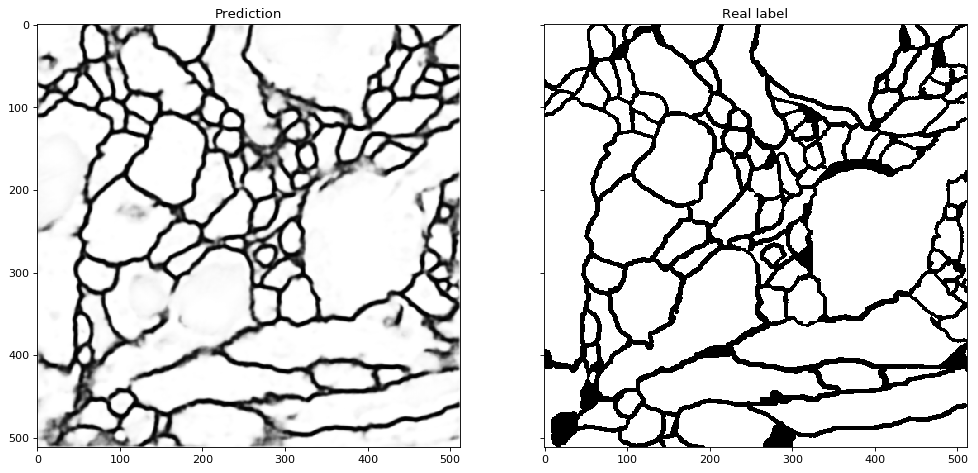

Network evaluation at epoch: 10 

train_avg_loss = 0.1889, train_avg_f1_score = 0.9175 
train_avg_precision = 0.8506, train_avg_recall = 0.9963 

val_avg_loss = 0.1902, val_avg_f1_score = 0.9194 
val_avg_precision = 0.8540, val_avg_recall = 0.9960 


epoch: 11, train loss: 0.18780329264700413


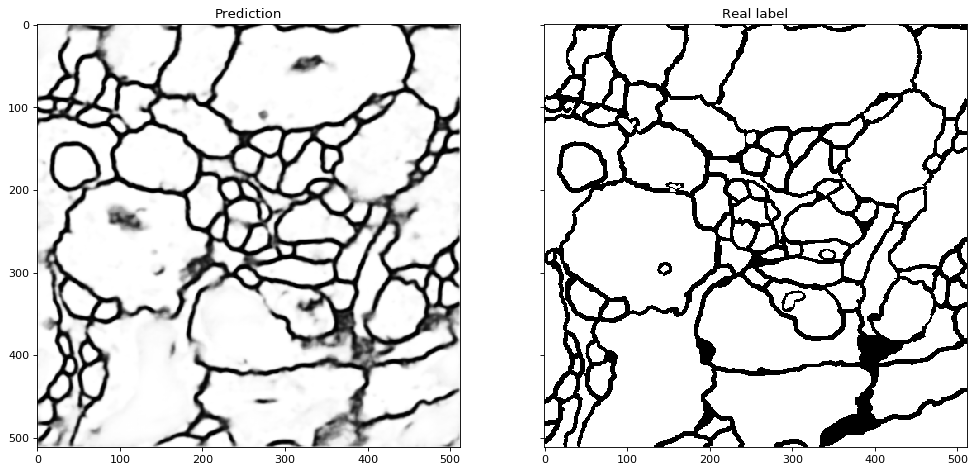

epoch: 12, train loss: 0.18371918673316637


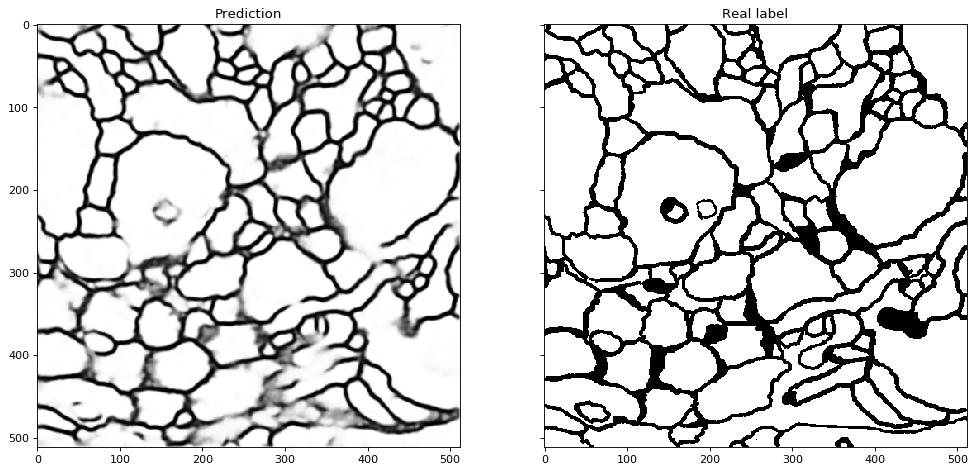

epoch: 13, train loss: 0.18376430869102478


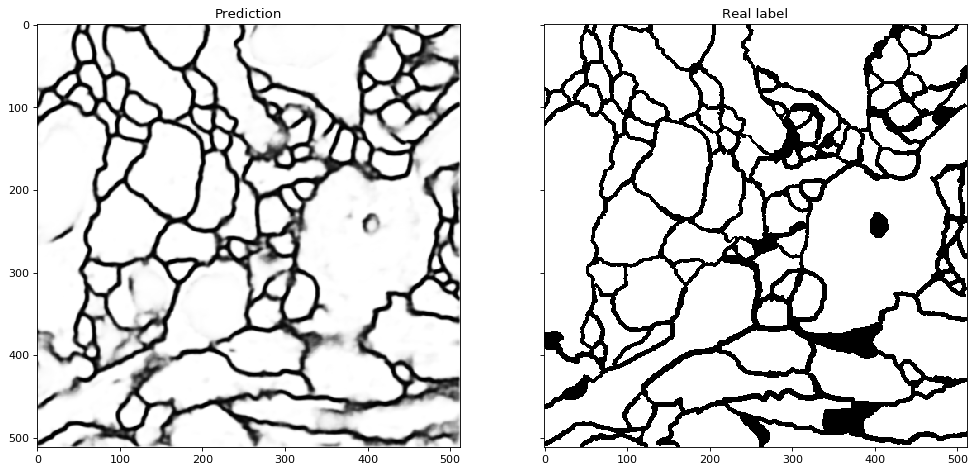

epoch: 14, train loss: 0.18046711757779121


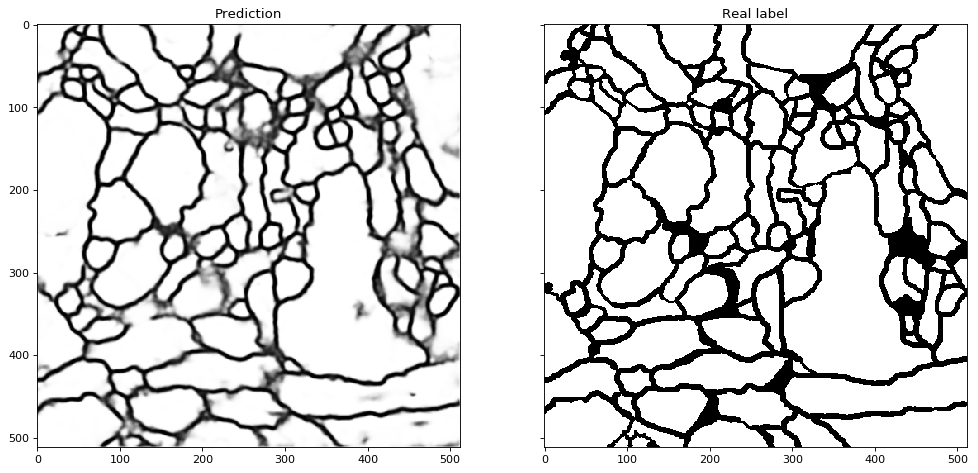

epoch: 15, train loss: 0.17985706155498823


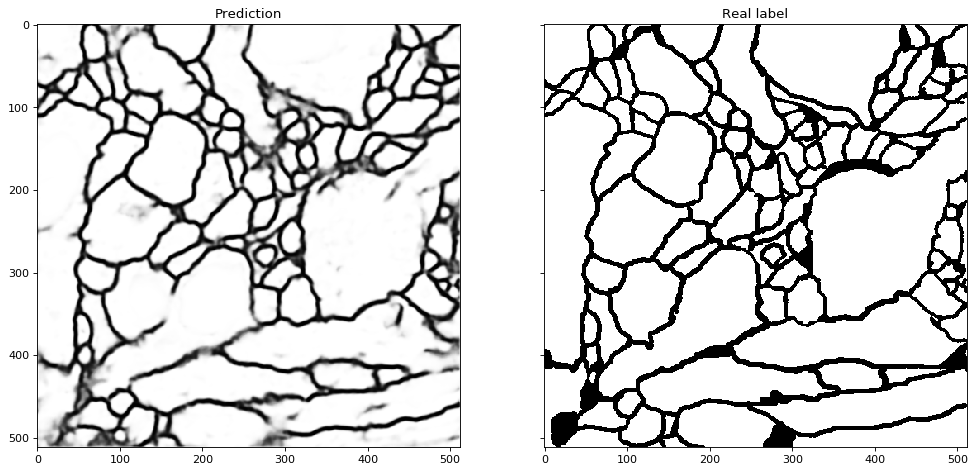

epoch: 16, train loss: 0.18254615056018034


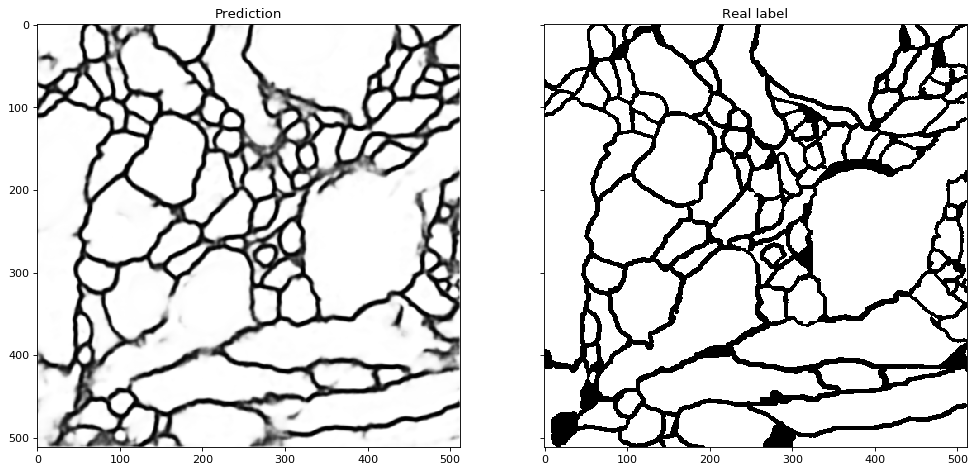

epoch: 17, train loss: 0.1770111278941234


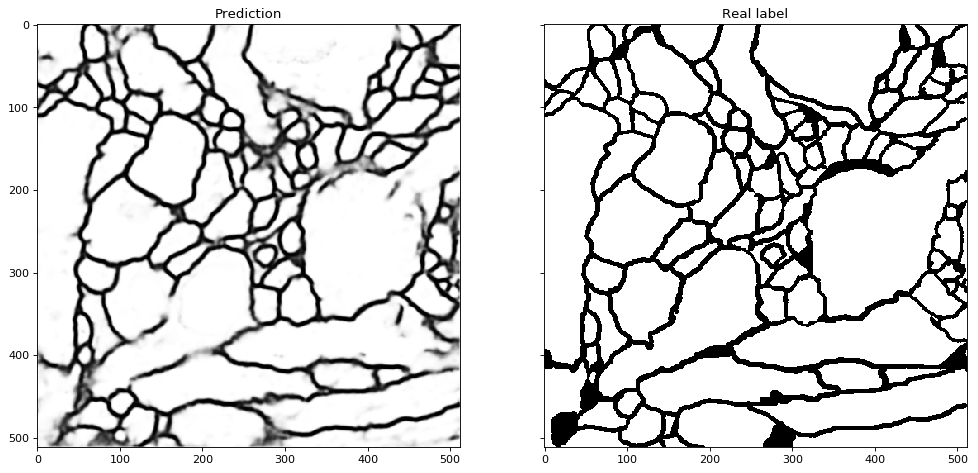

epoch: 18, train loss: 0.17310469845930734


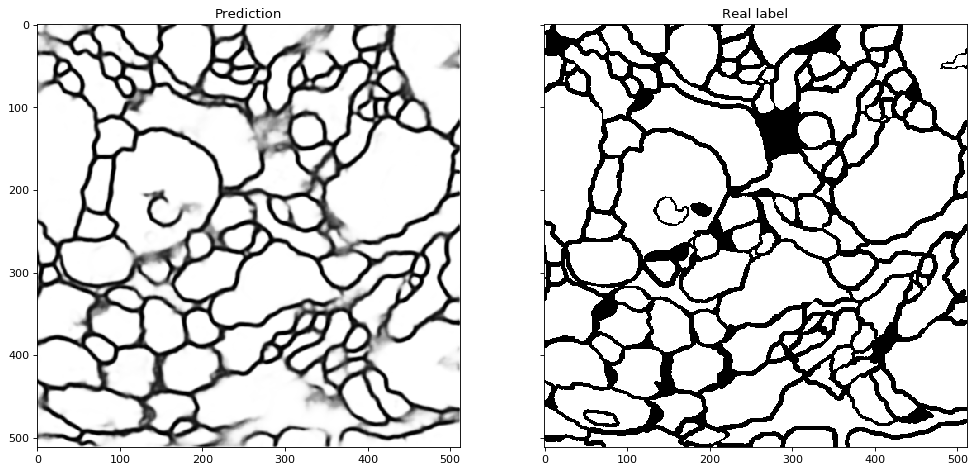

epoch: 19, train loss: 0.1730017395069202


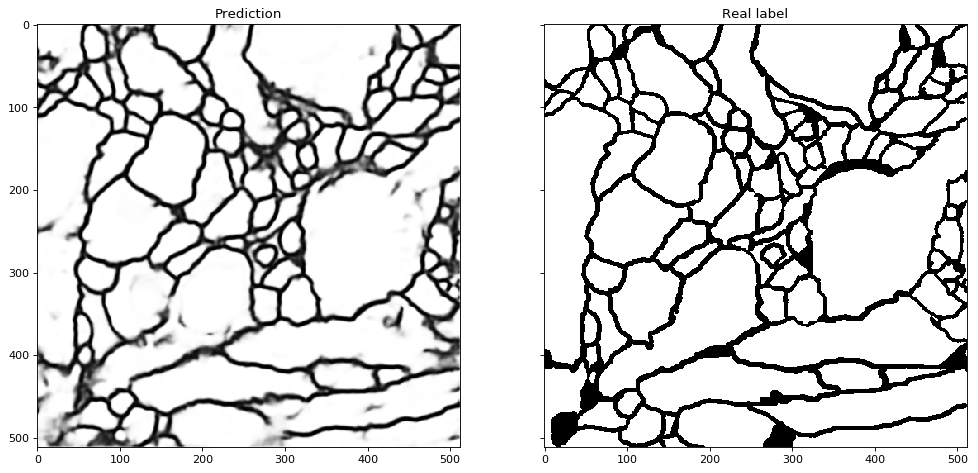

epoch: 20, train loss: 0.1716438258687655


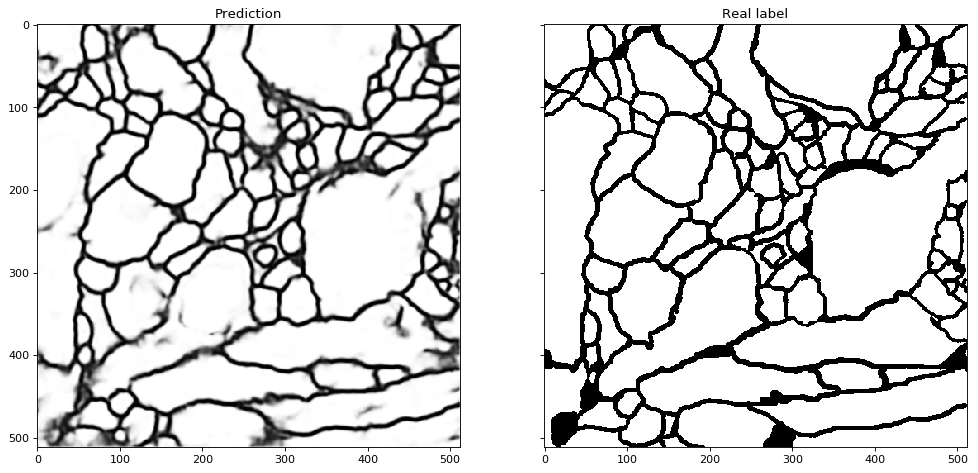

Network evaluation at epoch: 20 

train_avg_loss = 0.1674, train_avg_f1_score = 0.9199 
train_avg_precision = 0.8546, train_avg_recall = 0.9966 

val_avg_loss = 0.1783, val_avg_f1_score = 0.9215 
val_avg_precision = 0.8579, val_avg_recall = 0.9956 


epoch: 21, train loss: 0.16786258233090243


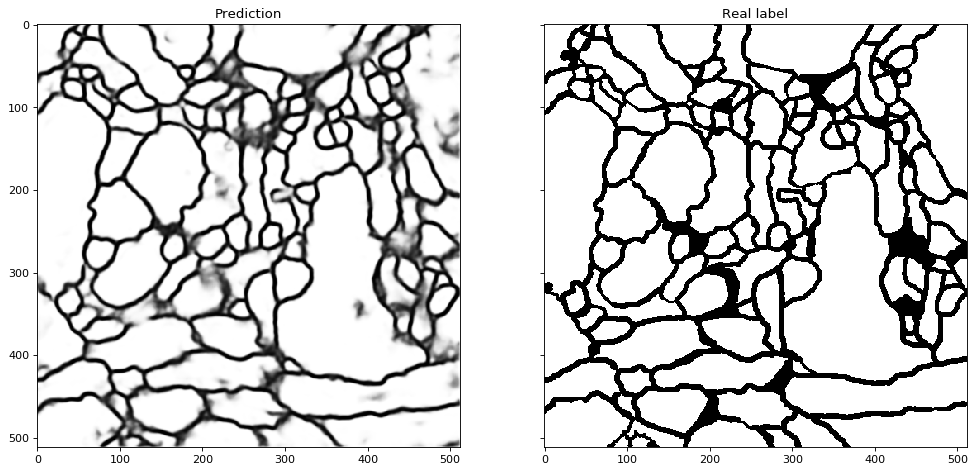

epoch: 22, train loss: 0.1637220618625482


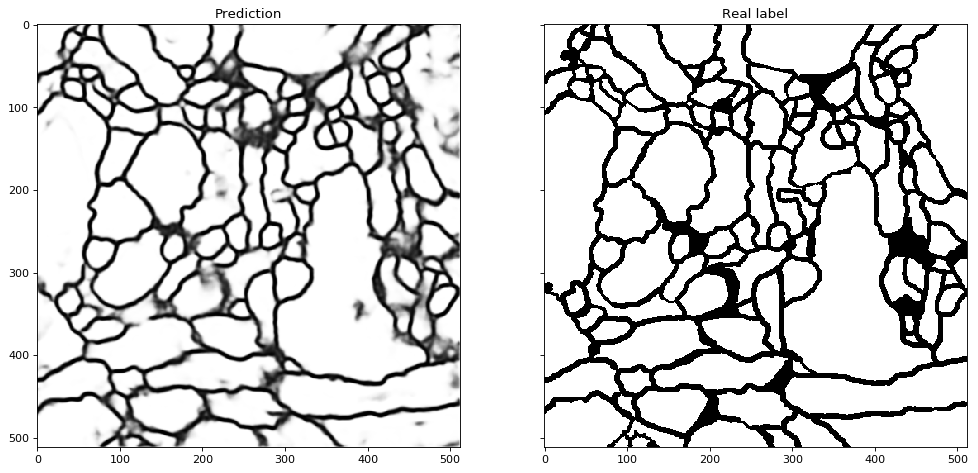

epoch: 23, train loss: 0.15912514987091222


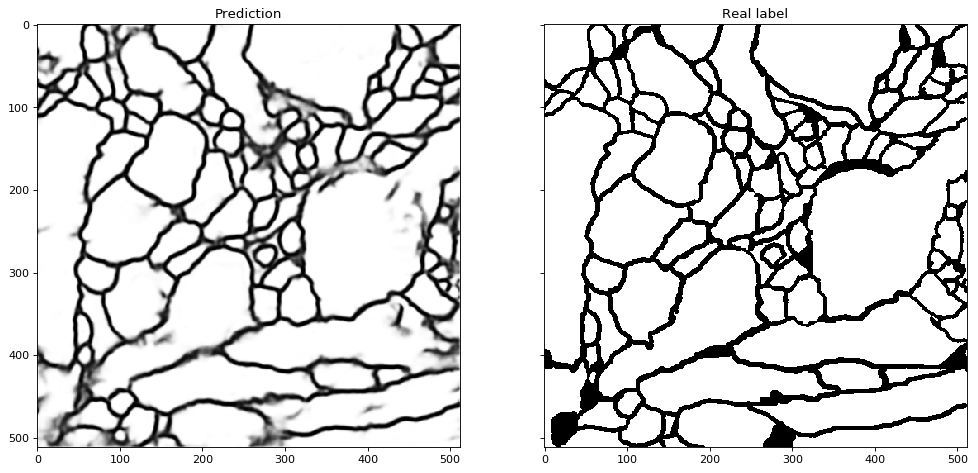

epoch: 24, train loss: 0.15630000084638596


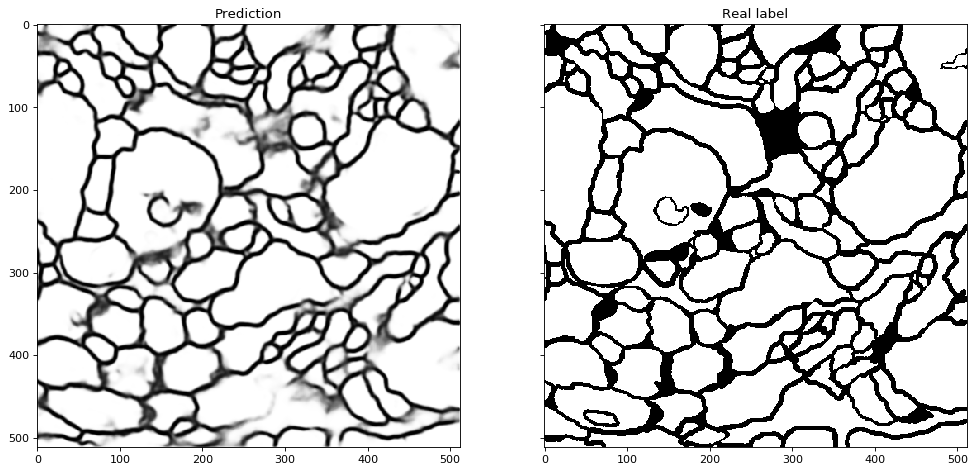

epoch: 25, train loss: 0.15809262543916702


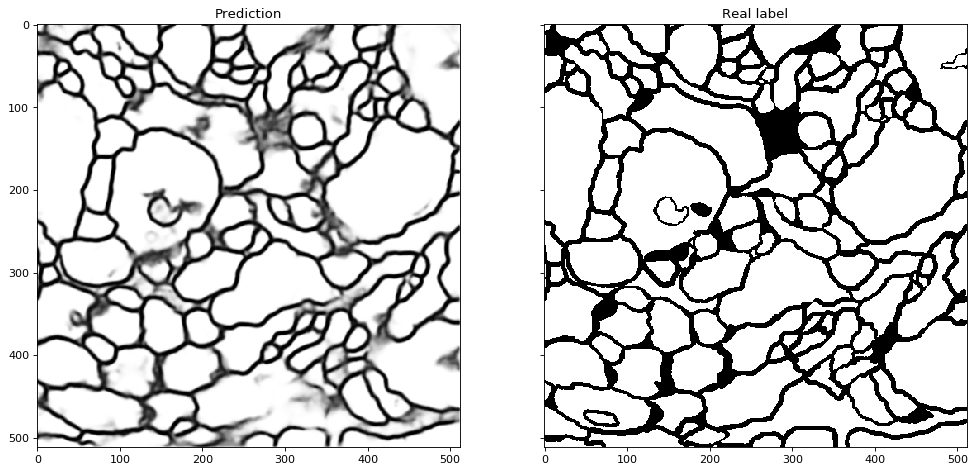

epoch: 26, train loss: 0.15905328715840975


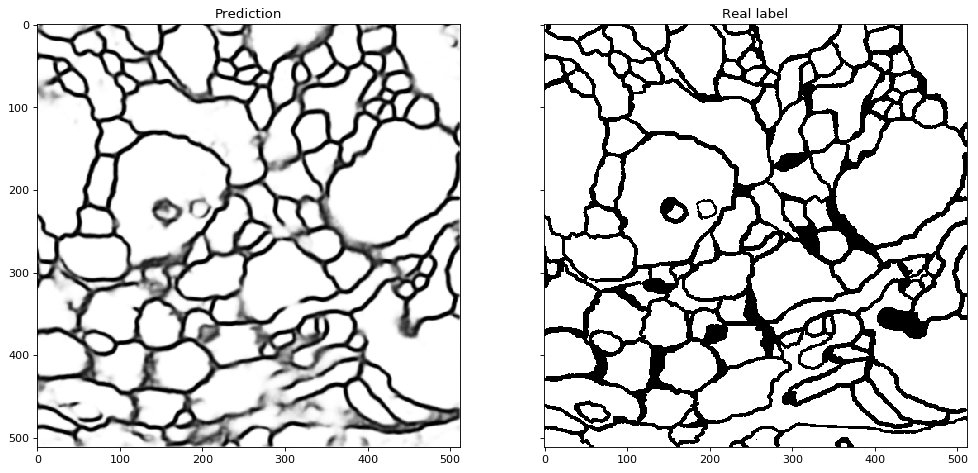

epoch: 27, train loss: 0.15790137834846973


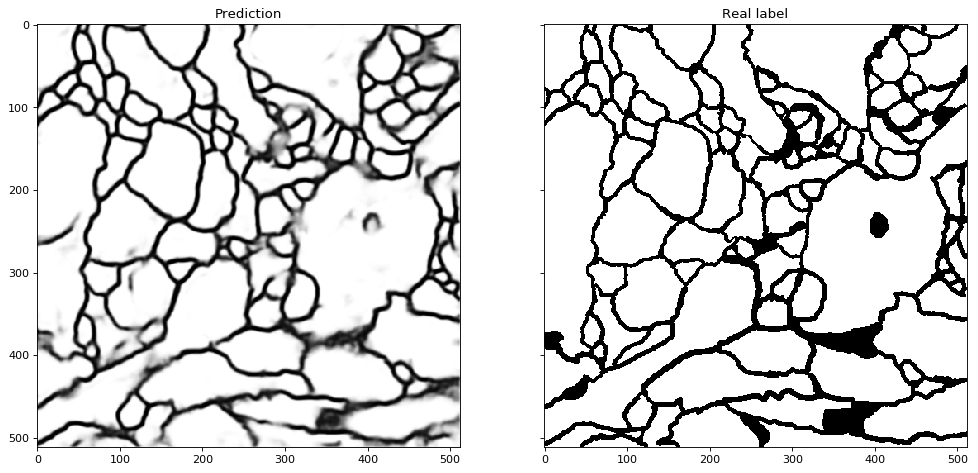

epoch: 28, train loss: 0.15215502306818962


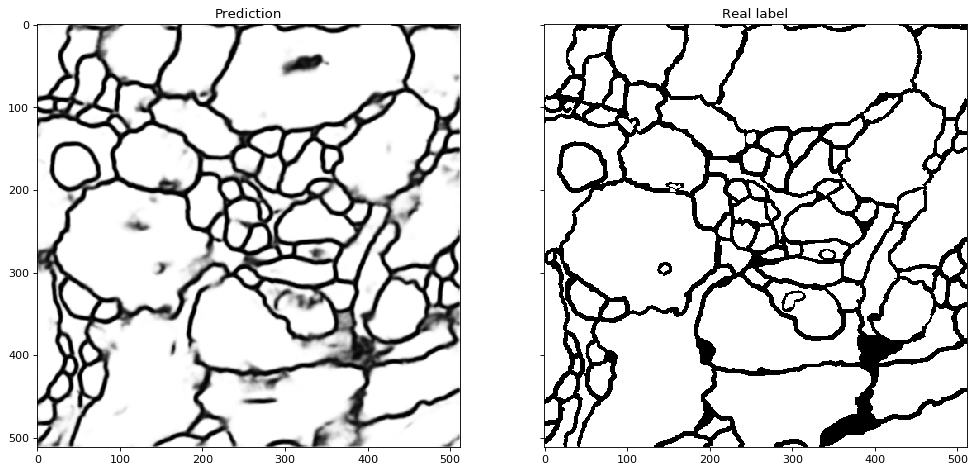

epoch: 29, train loss: 0.1482850369066


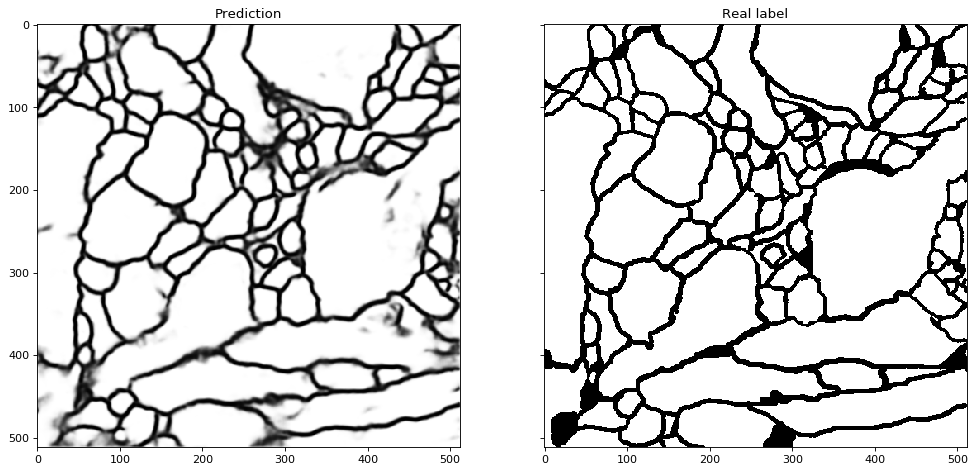

epoch: 30, train loss: 0.14781862994035086


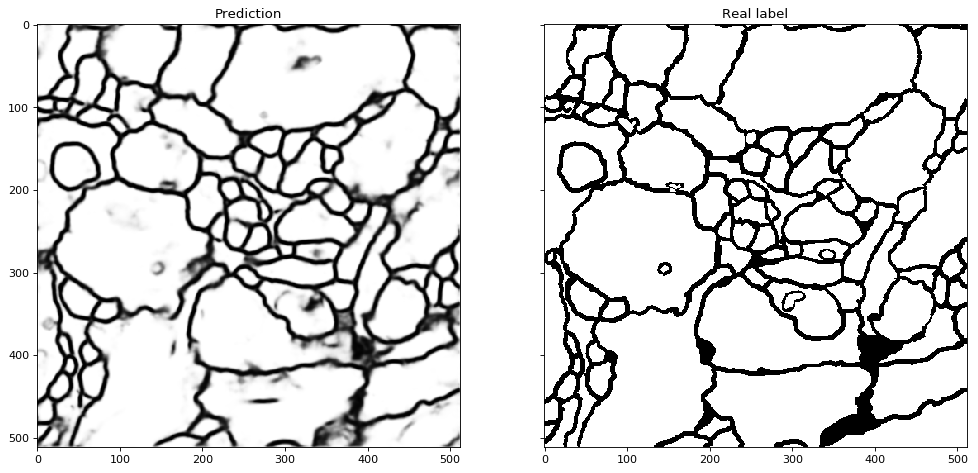

Network evaluation at epoch: 30 

train_avg_loss = 0.1489, train_avg_f1_score = 0.9230 
train_avg_precision = 0.8598, train_avg_recall = 0.9969 

val_avg_loss = 0.1767, val_avg_f1_score = 0.9228 
val_avg_precision = 0.8608, val_avg_recall = 0.9948 


epoch: 31, train loss: 0.14834540709853172


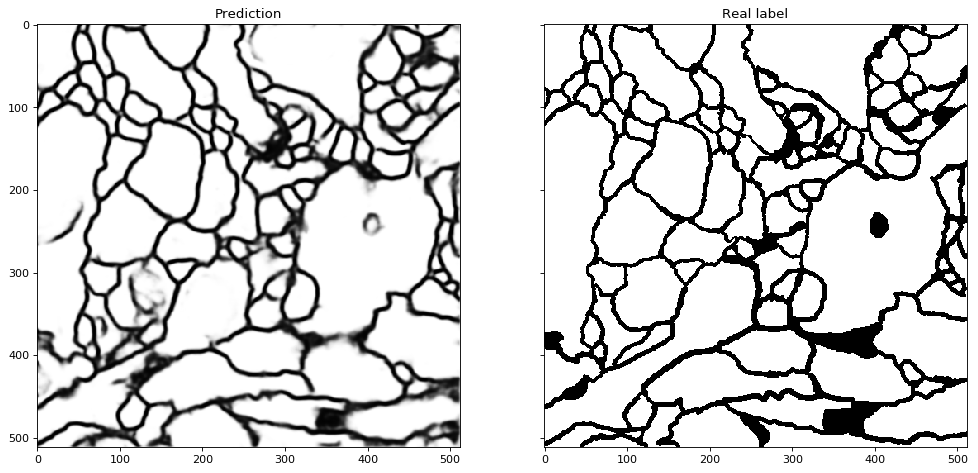

KeyboardInterrupt: 

In [24]:
# Prep GPU
GPU = torch.cuda.is_available()
print("GPU is {}enabled ".format(['not ', ''][GPU]))

batch_size = 1
n_epochs = 100


#unet(n_channels, n_classes, n_filters_start=64 )
un = unet(1,1)
if GPU: 
    un = un.cuda()

optimizer = torch.optim.Adam(un.parameters(), lr=0.01)
criterion = nn.BCELoss()




# split into training and validation set 
total_train_size = train_imgs.shape[0]
p = np.random.permutation(total_train_size)
train_imgs = train_imgs[p]
train_labels = train_labels[p]

val_size = int(0.2*total_train_size)

val_imgs = train_imgs[:val_size]
val_labels = train_labels[:val_size]

train_imgs = train_imgs[val_size:]
train_labels = train_labels[val_size:]

print("80/20 training/validation split")
print("total_train_size = ",total_train_size)
print("val_size = ", val_size)



# run training 
training(GPU, un,train_imgs, train_labels, val_imgs, val_labels, optimizer, criterion, n_epochs, batch_size)


In [ ]:
whos


# todo 

0. model.train() vs model.eval()
1. tune prediction threshold parameter 
2. disconnecting objects 
3. more datasets 
4. inception modules 